# Explainable AI with SHAP: Applications in Environmental Data Analysis

<div style="text-align: center;">
  <img src="shap_values_model.png" width="400"><br>
  <span style="font-size:10px;"><i>Image credit: 
    <a href="https://www.kdnuggets.com/2023/08/shap-values-model-interpretability-machine-learning.html">
      KDnuggets (2023)
    </a>
  </i></span>
</div>

**Course:** Environmental Data Analysis  
**Duration:** 75 minutes  
**Instructor:** Dr. Soheil Radfar

---

## Learning Objectives

By the end of this session, you will be able to:
1. Understand the black-box nature of machine learning models and the need for interpretability
2. Explain the key concepts and methods in Explainable AI (XAI)
3. Understand SHAP theory and mathematical foundations
4. Apply SHAP to coastal engineering problems using Python
5. Interpret SHAP values and visualizations for model insights

---

## 1. The Black-Box Problem in Machine Learning

### 1.1 Why Do We Need Explainable AI?

Machine learning models, particularly deep neural networks and ensemble methods, have achieved remarkable performance in coastal engineering applications:

- **Storm surge prediction**
- **Wave height forecasting**
- **Coastal erosion modeling**
- **Flood risk assessment**

However, these models operate as **"black boxes"**:

<img src="black_box_diagram.png" width="800">

### Key Questions We Cannot Answer with Black-Box Models:

1. **Which features** drive the prediction?
2. **How much** does each feature contribute?
3. **Why** did the model predict a storm surge of 2.5m instead of 2.0m?
4. **Is the model** learning physical relationships or spurious correlations?
5. **Can we trust** this prediction for decision-making?

### 1.2 Critical Importance in Coastal Engineering

In coastal engineering, model interpretability is not just academic—it's essential for:

- **Safety**: Understanding failure predictions for coastal structures
- **Regulations**: Meeting compliance requirements for flood risk assessments
- **Trust**: Building confidence among stakeholders and decision-makers
- **Scientific validation**: Ensuring models learn physical processes, not artifacts
- **Debugging**: Identifying when models make predictions for wrong reasons

**Example scenario:**  
A neural network predicts extreme flooding for a coastal community. Before evacuation orders, we need to know:
- Is it driven by wind speed, pressure, or astronomical tide?
- Is the prediction reliable given the input conditions?
- Does it align with known physics of compound flooding?

<img src="safety.png" width="500">

---

## 2. Introduction to Explainable AI (XAI)

### 2.1 What is Explainable AI?

**Explainable AI (XAI)** refers to methods and techniques that make the behavior and predictions of machine learning models understandable to humans.

<div style="text-align: center;">
  <img src="XAI.png" width="600"><br>
  <span style="font-size:10px;"><i>Image credit: 
    <a href="https://www.fluid.ai/blog/unleash-the-capability-of-explainable-artificial-intelligence-xai-with-the-power-of-gen-ai">
      fluidAI
    </a>
  </i></span>
</div>

### 2.2 Types of Model Interpretability

#### **Global Interpretability**
Understanding the model's overall behavior across the entire dataset.
- *Question:* "Overall, which features are most important for predicting storm surge?"
- *Example:* Feature importance rankings

#### **Local Interpretability**
Understanding individual predictions for specific instances.
- *Question:* "Why did the model predict 2.5m surge for Hurricane X?"
- *Example:* Contribution of each feature to a single prediction

### 2.3 Popular XAI Methods

| Method | Type | Key Idea | Limitations |
|--------|------|----------|-------------|
| **Feature Importance** | Global | Permutation-based importance | Doesn't show direction of effect |
| **Partial Dependence Plots** | Global | Marginal effect of features | Assumes feature independence |
| **LIME** | Local | Local linear approximation | Unstable, sampling-dependent |
| **SHAP** | Both | Game-theoretic feature attribution | Computationally intensive |
| **Attention Mechanisms** | Both | Weights in neural networks | Model-specific |

**Today's focus:** We'll dive deep into SHAP, which provides theoretically sound and practical explanations.

---

## 3. SHAP: SHapley Additive exPlanations

### 3.1 What is SHAP?

**SHAP** (Lundberg & Lee, 2017) is a unified framework for interpreting model predictions based on **Shapley values** from cooperative game theory.

**Core idea:** Treat each feature as a "player" in a cooperative game where the "payout" is the model's prediction. SHAP values represent each feature's contribution to moving the prediction from a baseline (expected value) to the actual prediction.

<div style="text-align: center;">
  <img src="shap.png" width="600"><br>
  <span style="font-size:10px;"><i>Image credit: 
    <a href="https://medium.com/@akashanandani.56/interpreting-black-box-models-with-shap-a-beginners-guide-c50f45b3161d">
      Anandani (2025)
    </a>
  </i></span>
</div>

### 3.2 Mathematical Foundation: Shapley Values

Shapley values come from game theory (Lloyd Shapley, 1953) and provide a way to fairly distribute a total payout among players based on their contributions.

For a prediction model $f$ with features $\mathbf{x} = (x_1, x_2, ..., x_p)$, the SHAP value $\phi_i$ for feature $i$ is:

$$
\phi_i = \sum_{S \subseteq F \setminus \{i\}} \frac{|S|! \, (p - |S| - 1)!}{p!} \left[ f_{S \cup \{i\}}(x_{S \cup \{i\}}) - f_S(x_S) \right]
$$

Where:
- $F$ = set of all features
- $S$ = subset of features (coalition)
- $p$ = total number of features
- $f_S(x_S)$ = model prediction using only features in subset $S$
- $|S|$ = size of subset $S$

**Interpretation:** The equation computes the average marginal contribution of feature $i$ across all possible feature coalitions.

### 3.3 Key Properties of SHAP Values

SHAP values satisfy three desirable properties:

#### 1. **Local Accuracy (Additivity)**
$$
f(\mathbf{x}) = \phi_0 + \sum_{i=1}^{p} \phi_i
$$

Where $\phi_0$ is the base value (average model output) and $\phi_i$ are SHAP values.

**Meaning:** The sum of SHAP values plus the base value equals the model's prediction.

#### 2. **Consistency (Monotonicity)**
If a model changes so that feature $i$ has a larger impact, its SHAP value cannot decrease.

#### 3. **Missingness**
If a feature is not used by the model, its SHAP value is zero.

These properties make SHAP theoretically grounded and reliable for interpretation.

### 3.4 Understanding the SHAP Equation

Let's break down the SHAP formula with a simple example:

**Scenario:** Predicting storm surge with 3 features: Wind Speed (W), Pressure (P), Wave Height (H)

To compute SHAP value for Wind Speed:

1. **Form all possible coalitions** without Wind Speed:
   - {} (empty)
   - {P}
   - {H}
   - {P, H}

2. **For each coalition**, compute the marginal contribution of adding Wind Speed:
   - $f(\{W\}) - f(\{\})$
   - $f(\{W, P\}) - f(\{P\})$
   - $f(\{W, H\}) - f(\{H\})$
   - $f(\{W, P, H\}) - f(\{P, H\})$

3. **Weight each contribution** by the number of orderings:
   $$\frac{|S|! \, (p - |S| - 1)!}{p!}$$

4. **Average** to get the SHAP value for Wind Speed

**Note:** With $p$ features, there are $2^p$ coalitions, making exact computation expensive for large $p$.

### 3.5 SHAP Value Interpretation

For a given prediction:

```
Base value (average prediction): 1.5 m

Feature contributions (SHAP values):
  Wind Speed:     +0.8 m
  Pressure:       -0.2 m
  Wave Height:    +0.4 m
  Tide:           +0.0 m
                  -------
Final prediction:  2.5 m
```

**Interpretation:**
- The average storm surge prediction is 1.5 m
- For this specific event:
  - High wind speed adds 0.8 m
  - Lower pressure (than average) reduces surge by 0.2 m
  - Wave height adds 0.4 m
  - Tide has no effect
- **Final prediction = 1.5 + 0.8 - 0.2 + 0.4 + 0.0 = 2.5 m**

### 3.6 SHAP Algorithm Variants

Computing exact SHAP values is computationally expensive ($O(2^p)$). Different algorithms provide approximations:

| Algorithm | Best For | Speed | Accuracy |
|-----------|----------|-------|----------|
| **TreeExplainer** | Tree-based models (RF, XGBoost, LightGBM) | Fast | Exact |
| **DeepExplainer** | Neural networks | Medium | Approximate |
| **KernelExplainer** | Any model (model-agnostic) | Slow | Approximate |
| **LinearExplainer** | Linear models | Very Fast | Exact |

**For coastal engineering:** TreeExplainer is often preferred due to the popularity of Random Forests and XGBoost, and it provides exact SHAP values efficiently.

---

## 4. Implementing SHAP in Python

### 4.1 Installation and Setup

In [ ]:
# Install required packages (run once)
# !pip install shap numpy pandas matplotlib seaborn scikit-learn xgboost

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# SHAP
import shap

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All packages imported successfully!")
print(f"SHAP version: {shap.__version__}")

All packages imported successfully!
SHAP version: 0.50.0


---

## 5. Hands-On Example: Wave Height Prediction

### 5.1 Problem Setup

We'll build a model to predict **significant wave height** ($H_s$) based on:
- Wind speed at 10m height
- Wind direction
- Atmospheric pressure
- Fetch length (distance over water)
- Water depth
- Wave period

We'll use the **NOAA National Data Buoy Center (NDBC)** data, which provides real-world coastal and offshore measurements.

### 5.2 Data Acquisition

We'll download data from NDBC Station 42040 (Luke Offshore Test Platform, 64 NM East of Dauphin Island, AL)

In [ ]:
# Download NDBC buoy data from station 42040 (Gulf of Mexico)
# This station is relevant for coastal Alabama studies

import urllib.request

# Function to download NDBC data
def download_ndbc_data(station_id='42040', year='2023'):
    """
    Download historical data from NDBC station

    Parameters:
    -----------
    station_id : str
        NDBC station identifier
    year : str
        Year of data to download
    """
    url = f'https://www.ndbc.noaa.gov/view_text_file.php?filename={station_id}h{year}.txt.gz&dir=data/historical/stdmet/'

    try:
        print(f"Downloading data from station {station_id} for year {year}...")
        urllib.request.urlretrieve(url, f'ndbc_{station_id}_{year}.txt')
        print("Download successful!")
        return f'ndbc_{station_id}_{year}.txt'
    except Exception as e:
        print(f"Error downloading data: {e}")
        print("Creating synthetic data instead...")
        return None

# Try to download real data
data_file = download_ndbc_data(station_id='42040', year='2023')

Download successful!


### 5.3 Data Loading and Preprocessing

In [ ]:
def load_ndbc_data(filename):
    """
    Load and preprocess NDBC buoy data

    Parameters
    ----------
    filename : str
        Path to NDBC data file (standard meteorological format)

    Returns
    -------
    pandas.DataFrame
        Cleaned dataframe with datetime index and columns:
        - wind_direction (degrees)
        - wind_speed (m/s)
        - wave_height (m)
        - wave_period (seconds)
        - pressure (hPa)
        - air_temp (°C)

    Notes
    -----
    - Handles NDBC missing value codes (99, 999, 9999)
    - Drops rows with any missing values
    - Uses manual parsing to avoid pandas/numpy compatibility issues
    """
    try:
        # Read file manually to bypass pandas CSV parser issues
        with open(filename, 'r') as f:
            lines = f.readlines()

        # Parse header (line 1) and skip units (line 2)
        header = lines[0].strip().split()
        data_lines = lines[2:]  # Skip header and units rows

        # Parse data into list of lists
        data = []
        for line in data_lines:
            values = line.strip().split()
            if len(values) >= len(header):  # Ensure we have all expected columns
                data.append(values)

        # Create DataFrame
        df = pd.DataFrame(data, columns=header)

        # Convert all columns to numeric
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Create datetime from year, month, day, hour, minute columns
        df['datetime'] = pd.to_datetime(
            df['#YY'].astype(int).astype(str) + '-' +
            df['MM'].astype(int).astype(str).str.zfill(2) + '-' +
            df['DD'].astype(int).astype(str).str.zfill(2) + ' ' +
            df['hh'].astype(int).astype(str).str.zfill(2) + ':' +
            df['mm'].astype(int).astype(str).str.zfill(2),
            format='%Y-%m-%d %H:%M',
            errors='coerce'
        )

        # Select relevant columns
        df_clean = df[['datetime', 'WDIR', 'WSPD', 'WVHT', 'APD', 'PRES', 'ATMP']].copy()

        # Replace NDBC missing value codes with NaN
        df_clean = df_clean.replace([99.0, 999.0, 9999.0, 99.00, 999.00, 9999.00], np.nan)

        # Drop rows with missing critical values
        df_clean = df_clean.dropna()

        # Rename columns for clarity
        df_clean.columns = ['datetime', 'wind_direction', 'wind_speed', 'wave_height',
                           'wave_period', 'pressure', 'air_temp']

        # Set datetime as index
        df_clean.set_index('datetime', inplace=True)

        print(f"Successfully loaded {len(df_clean)} valid records from {len(data)} total records")
        print(f"Date range: {df_clean.index.min()} to {df_clean.index.max()}")

        return df_clean

    except Exception as e:
        print(f"Error loading data: {e}")
        import traceback
        traceback.print_exc()
        return None
# Load real data if available, otherwise create synthetic data
if data_file is not None:
    df = load_ndbc_data(data_file)

Successfully loaded 16047 valid records from 52521 total records
Date range: 2023-01-01 04:10:00 to 2023-12-31 23:40:00


In [ ]:
df

,wind_direction,wind_speed,wave_height,wave_period,pressure,air_temp
datetime,,,,,,
2023-01-01 04:10:00,209.0,1.6,0.84,5.14,1018.4,21.0
2023-01-01 04:40:00,220.0,1.4,0.84,5.08,1018.3,20.9
2023-01-01 05:10:00,226.0,1.6,0.82,5.00,1018.0,20.9
2023-01-01 05:40:00,232.0,1.5,0.79,5.01,1017.7,20.9
2023-01-01 06:10:00,231.0,1.6,0.71,4.92,1017.6,20.9
...,...,...,...,...,...,...
2023-12-31 21:40:00,224.0,2.8,0.32,4.23,1022.7,17.7
2023-12-31 22:10:00,236.0,2.1,0.30,4.40,1022.6,17.8
2023-12-31 22:40:00,232.0,2.8,0.28,4.20,1022.8,17.8


In [ ]:
# Function to load and preprocess NDBC data
def load_ndbc_data(filename):
    """
    Load and preprocess NDBC buoy data
    """
    try:
        # Read the data (skip first row which contains units)
        df = pd.read_csv(filename, delim_whitespace=True, skiprows=[1])

        # Create datetime index
        df['datetime'] = pd.to_datetime(df[['#YY', 'MM', 'DD', 'hh', 'mm']].rename(
            columns={'#YY': 'year', 'MM': 'month', 'DD': 'day', 'hh': 'hour', 'mm': 'minute'}))

        # Select relevant columns and rename
        # WVHT: Wave height (m), WSPD: Wind speed (m/s), WDIR: Wind direction (deg)
        # PRES: Pressure (hPa), APD: Average period (s), ATMP: Air temp (C)
        df_clean = df[['datetime', 'WDIR', 'WSPD', 'WVHT', 'APD', 'PRES', 'ATMP']].copy()

        # Replace missing values (99.0, 999.0, etc.) with NaN
        df_clean = df_clean.replace([99.0, 999.0, 9999.0, 99.00, 999.00], np.nan)

        # Drop rows with missing critical values
        df_clean = df_clean.dropna()

        # Rename columns for clarity
        df_clean.columns = ['datetime', 'wind_direction', 'wind_speed', 'wave_height',
                           'wave_period', 'pressure', 'air_temp']

        return df_clean

    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load real data if available, otherwise create synthetic data
if data_file is not None:
    df = load_ndbc_data(data_file)

### 5.4 Exploratory Data Analysis

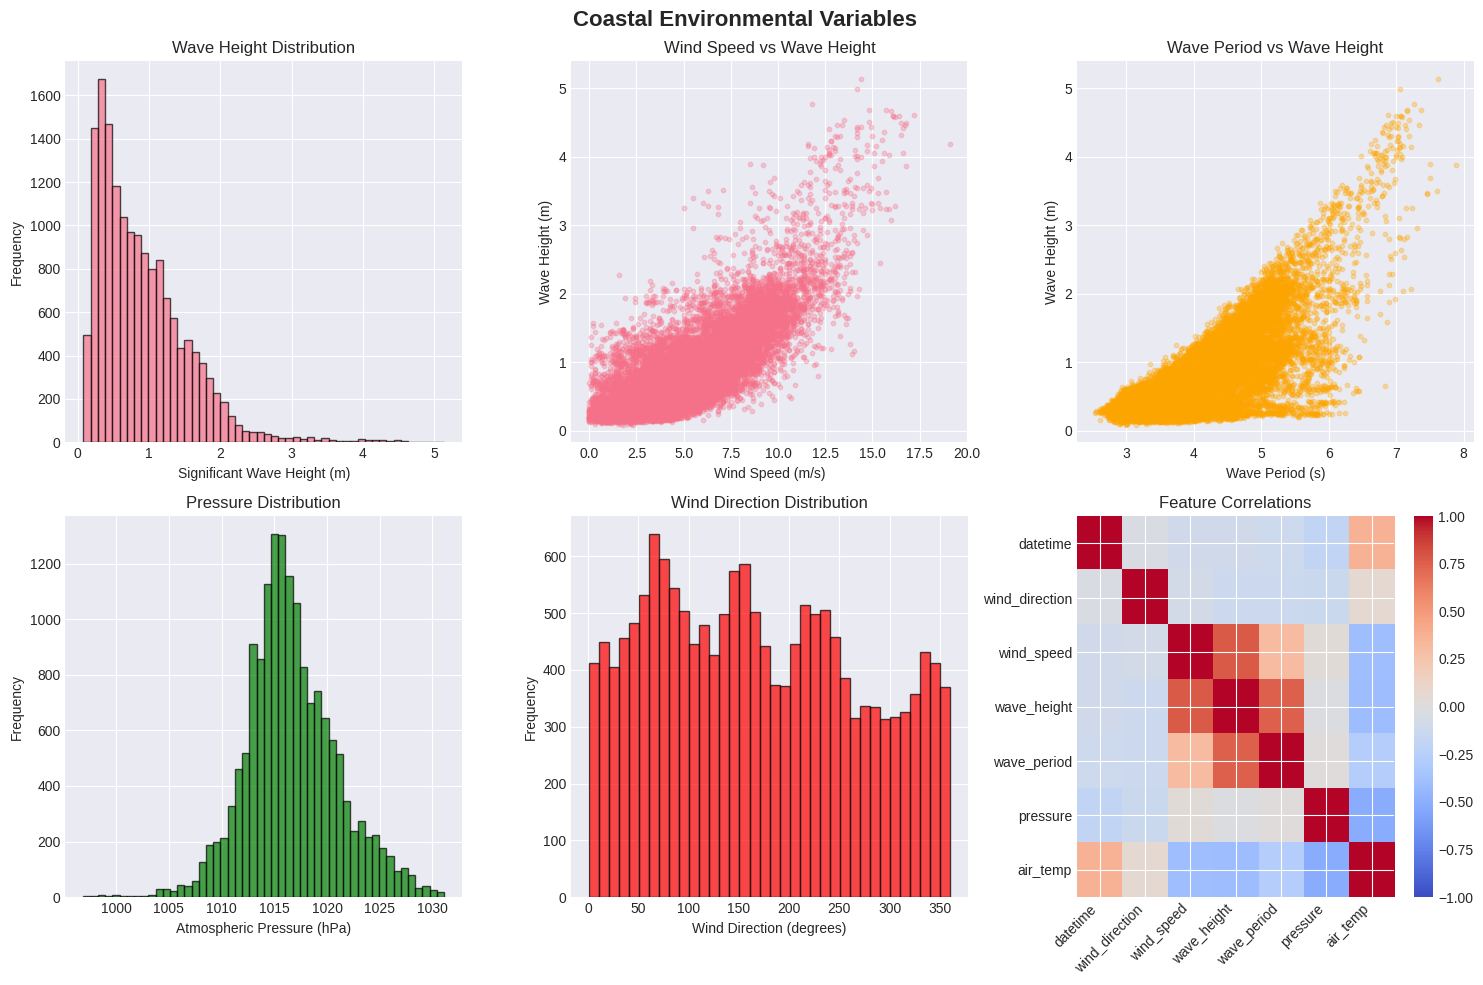

In [ ]:
# Visualize the data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Coastal Environmental Variables', fontsize=16, fontweight='bold')

# Wave height distribution
axes[0, 0].hist(df['wave_height'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Significant Wave Height (m)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Wave Height Distribution')

# Wind speed vs wave height
axes[0, 1].scatter(df['wind_speed'], df['wave_height'], alpha=0.3, s=10)
axes[0, 1].set_xlabel('Wind Speed (m/s)')
axes[0, 1].set_ylabel('Wave Height (m)')
axes[0, 1].set_title('Wind Speed vs Wave Height')

# Wave period vs wave height
axes[0, 2].scatter(df['wave_period'], df['wave_height'], alpha=0.3, s=10, c='orange')
axes[0, 2].set_xlabel('Wave Period (s)')
axes[0, 2].set_ylabel('Wave Height (m)')
axes[0, 2].set_title('Wave Period vs Wave Height')

# Pressure distribution
axes[1, 0].hist(df['pressure'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('Atmospheric Pressure (hPa)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Pressure Distribution')

# Wind direction distribution
axes[1, 1].hist(df['wind_direction'], bins=36, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_xlabel('Wind Direction (degrees)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Wind Direction Distribution')

# Correlation heatmap
corr = df.corr()
im = axes[1, 2].imshow(corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 2].set_xticks(range(len(corr.columns)))
axes[1, 2].set_yticks(range(len(corr.columns)))
axes[1, 2].set_xticklabels(corr.columns, rotation=45, ha='right')
axes[1, 2].set_yticklabels(corr.columns)
axes[1, 2].set_title('Feature Correlations')
plt.colorbar(im, ax=axes[1, 2])

plt.tight_layout()
plt.show()

In [ ]:
df

,datetime,wind_direction,wind_speed,wave_height,wave_period,pressure,air_temp
25,2023-01-01 04:10:00,209.0,1.6,0.84,5.14,1018.4,21.0
28,2023-01-01 04:40:00,220.0,1.4,0.84,5.08,1018.3,20.9
31,2023-01-01 05:10:00,226.0,1.6,0.82,5.00,1018.0,20.9
34,2023-01-01 05:40:00,232.0,1.5,0.79,5.01,1017.7,20.9
37,2023-01-01 06:10:00,231.0,1.6,0.71,4.92,1017.6,20.9
...,...,...,...,...,...,...,...
52507,2023-12-31 21:40:00,224.0,2.8,0.32,4.23,1022.7,17.7
52510,2023-12-31 22:10:00,236.0,2.1,0.30,4.40,1022.6,17.8
52513,2023-12-31 22:40:00,232.0,2.8,0.28,4.20,1022.8,17.8
52516,2023-12-31 23:10:00,219.0,2.2,0.30,4.49,1022.6,17.6


### 5.5 Feature Engineering

In [ ]:
# Create additional features based on physical relationships

# Convert wind direction to cardinal components
df['wind_u'] = df['wind_speed'] * np.sin(np.radians(df['wind_direction']))  # East-West
df['wind_v'] = df['wind_speed'] * np.cos(np.radians(df['wind_direction']))  # North-South

# Wave steepness (dimensionless)
df['wave_steepness'] = df['wave_height'] / (1.56 * df['wave_period']**2)  # H/L where L=gT²/2π

# Pressure anomaly
df['pressure_anomaly'] = df['pressure'] - df['pressure'].mean()

print("Engineered features created!")
print(f"Updated dataset shape: {df.shape}")
print(f"\nNew features: {df.columns.tolist()[-4:]}")

Engineered features created!
Updated dataset shape: (16047, 11)

New features: ['wind_u', 'wind_v', 'wave_steepness', 'pressure_anomaly']


### 5.6 Model Training

In [ ]:
# Prepare features and target
feature_cols = ['wind_speed', 'wind_direction', 'pressure', 'wave_period',
                'air_temp', 'wind_u', 'wind_v', 'wave_steepness', 'pressure_anomaly']

X = df[feature_cols]
y = df['wave_height']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Train Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=5,
                                  random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Train XGBoost model
print("Training XGBoost model...")
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                              random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

print("\nModels trained successfully!")

Training set size: 12837
Test set size: 3210
Number of features: 9

Training Random Forest model...
Training XGBoost model...

Models trained successfully!


### 5.7 Model Evaluation


Random Forest Performance:
  RMSE: 0.0182 m
  MAE:  0.0058 m
  R²:   0.9992

XGBoost Performance:
  RMSE: 0.0240 m
  MAE:  0.0095 m
  R²:   0.9986


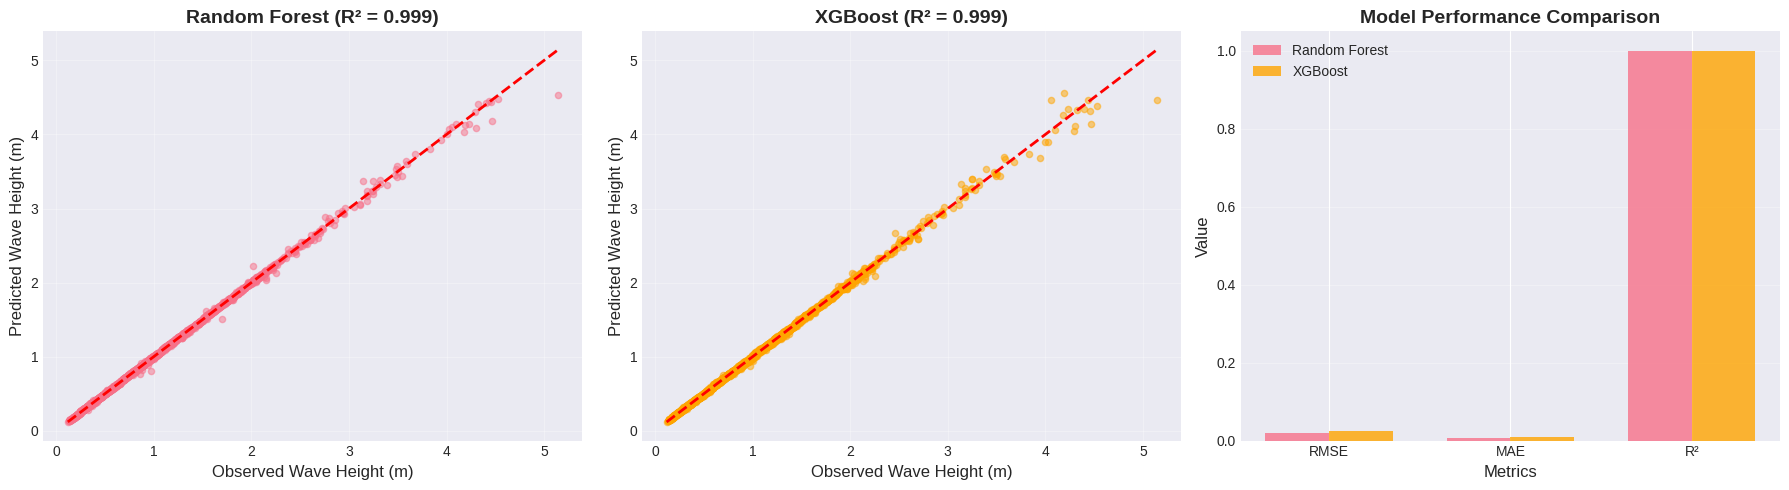


Models are trained and evaluated. Now let's explain them with SHAP!


In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  RMSE: {rmse:.4f} m")
    print(f"  MAE:  {mae:.4f} m")
    print(f"  R²:   {r2:.4f}")

    return rmse, mae, r2

rf_rmse, rf_mae, rf_r2 = evaluate_model(y_test, y_pred_rf, "Random Forest")
xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest predictions
axes[0].scatter(y_test, y_pred_rf, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Observed Wave Height (m)', fontsize=12)
axes[0].set_ylabel('Predicted Wave Height (m)', fontsize=12)
axes[0].set_title(f'Random Forest (R² = {rf_r2:.3f})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# XGBoost predictions
axes[1].scatter(y_test, y_pred_xgb, alpha=0.5, s=20, c='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Observed Wave Height (m)', fontsize=12)
axes[1].set_ylabel('Predicted Wave Height (m)', fontsize=12)
axes[1].set_title(f'XGBoost (R² = {xgb_r2:.3f})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Model comparison bar chart
metrics = ['RMSE', 'MAE', 'R²']
rf_metrics = [rf_rmse, rf_mae, rf_r2]
xgb_metrics = [xgb_rmse, xgb_mae, xgb_r2]

x = np.arange(len(metrics))
width = 0.35

axes[2].bar(x - width/2, rf_metrics, width, label='Random Forest', alpha=0.8)
axes[2].bar(x + width/2, xgb_metrics, width, label='XGBoost', alpha=0.8, color='orange')
axes[2].set_xlabel('Metrics', fontsize=12)
axes[2].set_ylabel('Value', fontsize=12)
axes[2].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(metrics)
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Models are trained and evaluated. Now let's explain them with SHAP!")
print("="*60)

---

## 6. SHAP Analysis

### 6.1 Computing SHAP Values

Now we'll compute SHAP values to understand:
1. Which features are most important globally?
2. How does each feature contribute to individual predictions?
3. What are the relationships between features and predictions?

In [ ]:
# Initialize JavaScript visualization (needed for SHAP plots in Jupyter)
shap.initjs()

# Create SHAP explainers for both models
print("Creating SHAP explainer for Random Forest...")
explainer_rf = shap.TreeExplainer(rf_model)

print("Creating SHAP explainer for XGBoost...")
explainer_xgb = shap.TreeExplainer(xgb_model)

# Compute SHAP values (using a sample for speed)
sample_size = min(200, len(X_test))
X_test_sample = X_test.sample(n=sample_size, random_state=42)

print(f"\nComputing SHAP values for {len(X_test_sample)} test samples...")
shap_values_rf = explainer_rf.shap_values(X_test_sample)
shap_values_xgb = explainer_xgb.shap_values(X_test_sample)

print("SHAP values computed successfully!")
print(f"\nSHAP values shape: {shap_values_rf.shape}")
print(f"Base value (average prediction): {float(explainer_rf.expected_value):.4f} m")

Creating SHAP explainer for Random Forest...
Creating SHAP explainer for XGBoost...

Computing SHAP values for 200 test samples...
SHAP values computed successfully!

SHAP values shape: (200, 9)
Base value (average prediction): 0.9042 m


### 6.2 SHAP Summary Plot (Global Feature Importance)

The **summary plot** shows:
- Which features are most important overall
- The distribution of SHAP values for each feature
- Whether high/low feature values increase or decrease predictions

Random Forest - SHAP Summary Plot


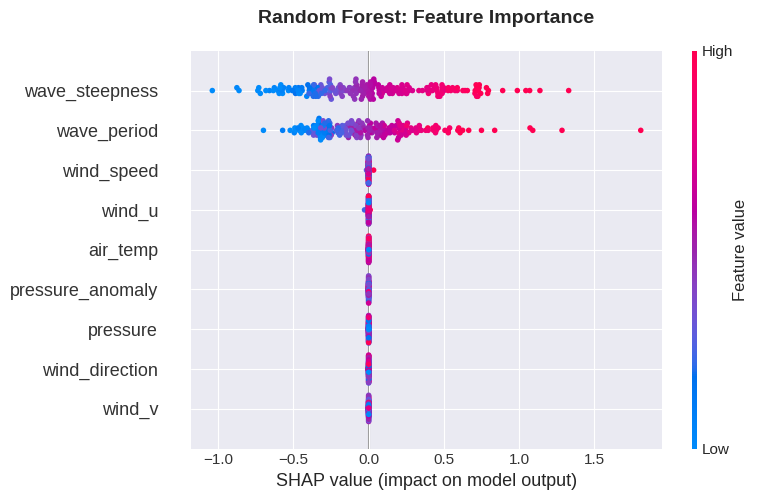


How to read this plot:
- Features are ranked by importance (top to bottom)
- Each dot is a sample
- Color indicates feature value (red=high, blue=low)
- Position on x-axis shows SHAP value (impact on prediction)
- Positive SHAP = increases wave height prediction
- Negative SHAP = decreases wave height prediction


In [ ]:
# Summary plot for Random Forest
print("Random Forest - SHAP Summary Plot")
print("="*60)
shap.summary_plot(shap_values_rf, X_test_sample, plot_type="dot", show=False)
plt.title('Random Forest: Feature Importance', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("How to read this plot:")
print("- Features are ranked by importance (top to bottom)")
print("- Each dot is a sample")
print("- Color indicates feature value (red=high, blue=low)")
print("- Position on x-axis shows SHAP value (impact on prediction)")
print("- Positive SHAP = increases wave height prediction")
print("- Negative SHAP = decreases wave height prediction")
print("="*60)

### 6.3 SHAP Bar Plot (Mean Absolute Feature Importance)

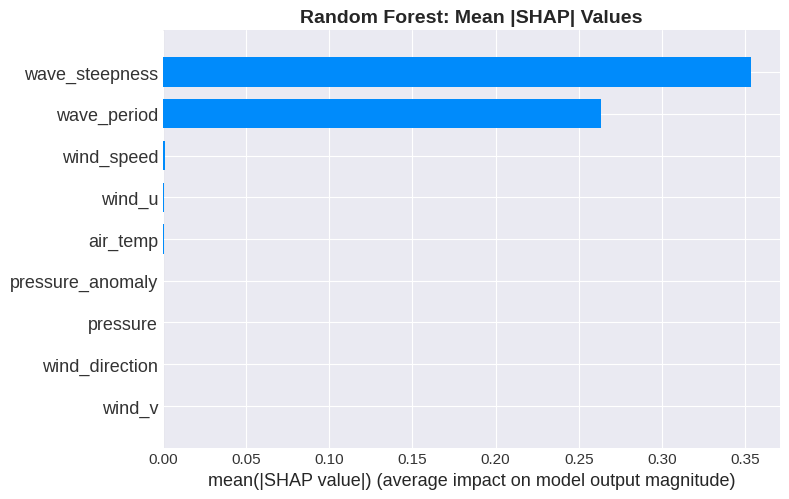

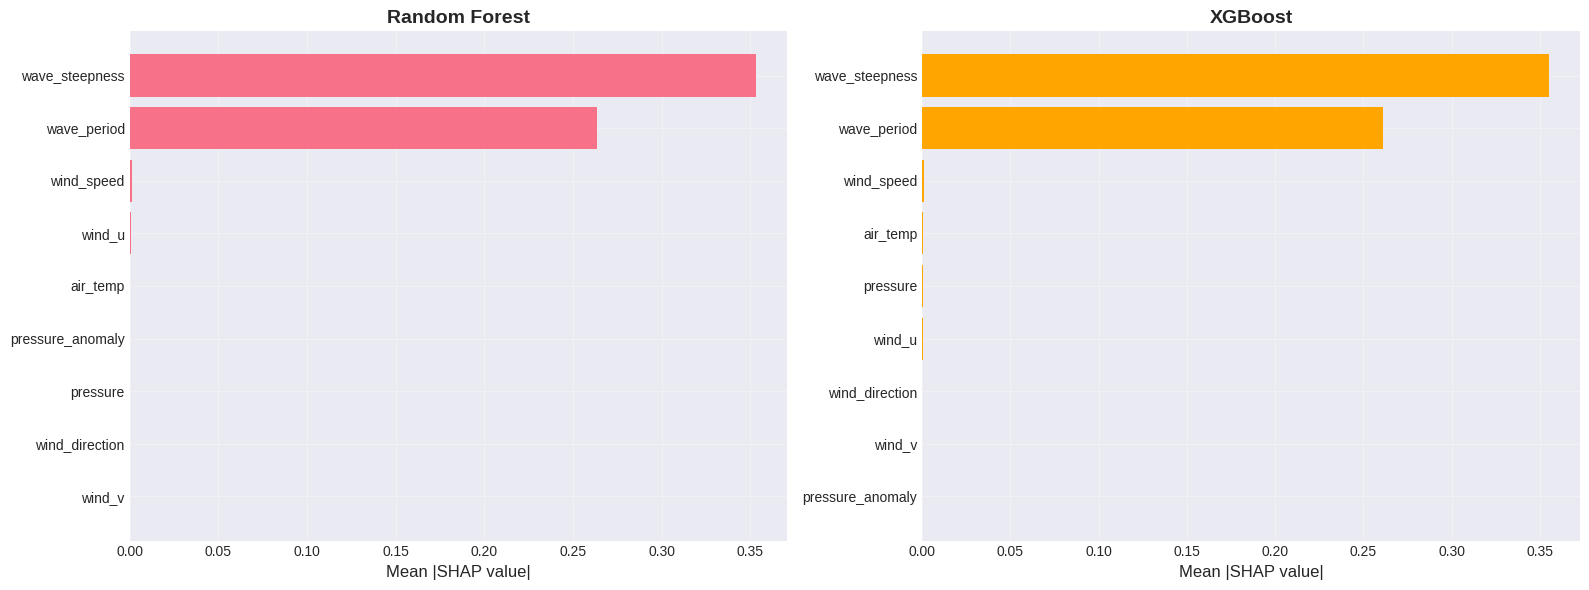

In [ ]:
# Bar plot showing average absolute SHAP values
shap.summary_plot(shap_values_rf, X_test_sample, plot_type="bar", show=False)
plt.title('Random Forest: Mean |SHAP| Values', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Compare Random Forest and XGBoost
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate mean absolute SHAP values
mean_shap_rf = np.abs(shap_values_rf).mean(axis=0)
mean_shap_xgb = np.abs(shap_values_xgb).mean(axis=0)

# Sort by importance
sorted_idx_rf = np.argsort(mean_shap_rf)
sorted_idx_xgb = np.argsort(mean_shap_xgb)

axes[0].barh(range(len(sorted_idx_rf)), mean_shap_rf[sorted_idx_rf])
axes[0].set_yticks(range(len(sorted_idx_rf)))
axes[0].set_yticklabels(X_test_sample.columns[sorted_idx_rf])
axes[0].set_xlabel('Mean |SHAP value|', fontsize=12)
axes[0].set_title('Random Forest', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].barh(range(len(sorted_idx_xgb)), mean_shap_xgb[sorted_idx_xgb], color='orange')
axes[1].set_yticks(range(len(sorted_idx_xgb)))
axes[1].set_yticklabels(X_test_sample.columns[sorted_idx_xgb])
axes[1].set_xlabel('Mean |SHAP value|', fontsize=12)
axes[1].set_title('XGBoost', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.4 SHAP Dependence Plots

**Dependence plots** show how a single feature affects predictions:
- X-axis: Feature value
- Y-axis: SHAP value (impact on prediction)
- Color: Another feature (showing interactions)

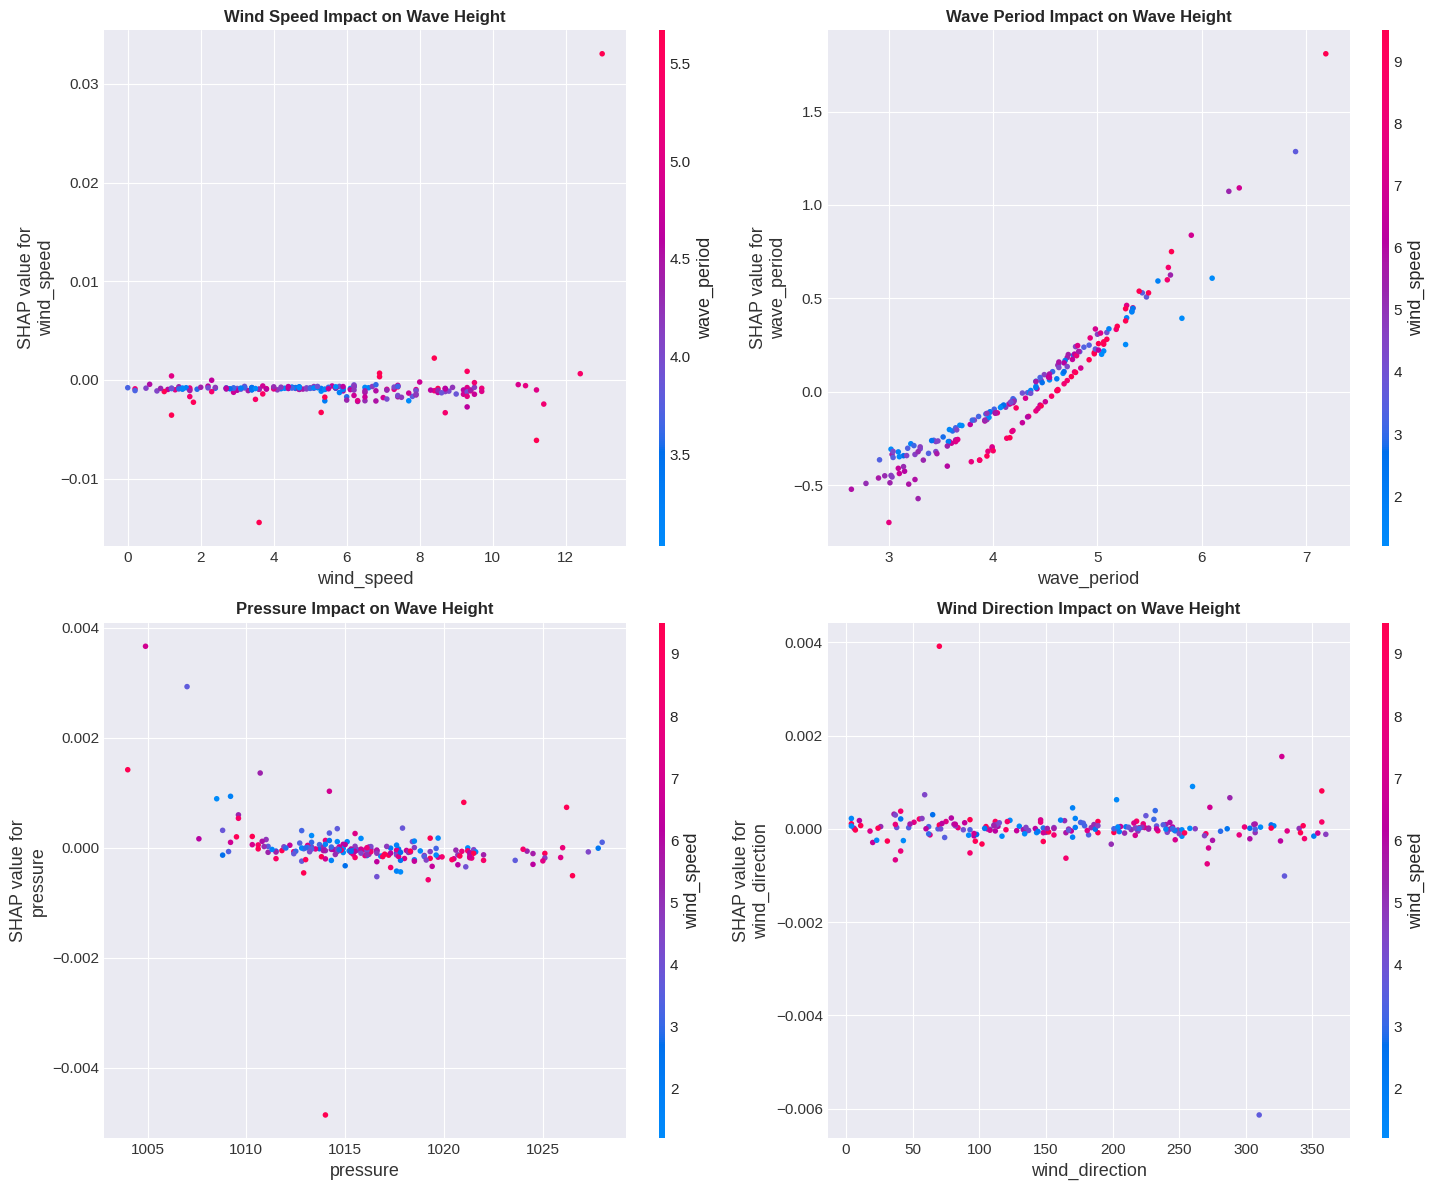


Key Insights from Dependence Plots:
- Positive relationship: Higher wind speed → Higher wave height
- Interaction effects: Wave period modifies wind speed impact
- Physical consistency: Results align with wave generation theory


In [ ]:
# Dependence plot for most important features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Wind speed
shap.dependence_plot("wind_speed", shap_values_rf, X_test_sample,
                     interaction_index="wave_period", ax=axes[0, 0], show=False)
axes[0, 0].set_title('Wind Speed Impact on Wave Height', fontsize=12, fontweight='bold')

# Wave period
shap.dependence_plot("wave_period", shap_values_rf, X_test_sample,
                     interaction_index="wind_speed", ax=axes[0, 1], show=False)
axes[0, 1].set_title('Wave Period Impact on Wave Height', fontsize=12, fontweight='bold')

# Pressure
shap.dependence_plot("pressure", shap_values_rf, X_test_sample,
                     interaction_index="wind_speed", ax=axes[1, 0], show=False)
axes[1, 0].set_title('Pressure Impact on Wave Height', fontsize=12, fontweight='bold')

# Wind direction
shap.dependence_plot("wind_direction", shap_values_rf, X_test_sample,
                     interaction_index="wind_speed", ax=axes[1, 1], show=False)
axes[1, 1].set_title('Wind Direction Impact on Wave Height', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insights from Dependence Plots:")
print("- Positive relationship: Higher wind speed → Higher wave height")
print("- Interaction effects: Wave period modifies wind speed impact")
print("- Physical consistency: Results align with wave generation theory")

### 6.5 Individual Prediction Explanation (Waterfall Plot)

For a single prediction, we can see exactly how each feature contributed.


Explaining a single prediction:
Base value (average): 0.904 m
Predicted wave height: 4.088 m
Actual wave height: 4.300 m

Feature values:
  wind_speed: 13.00
  wind_direction: 70.00
  pressure: 1014.00
  wave_period: 7.19
  air_temp: 23.30
  wind_u: 12.22
  wind_v: 4.45
  wave_steepness: 0.05
  pressure_anomaly: -2.63


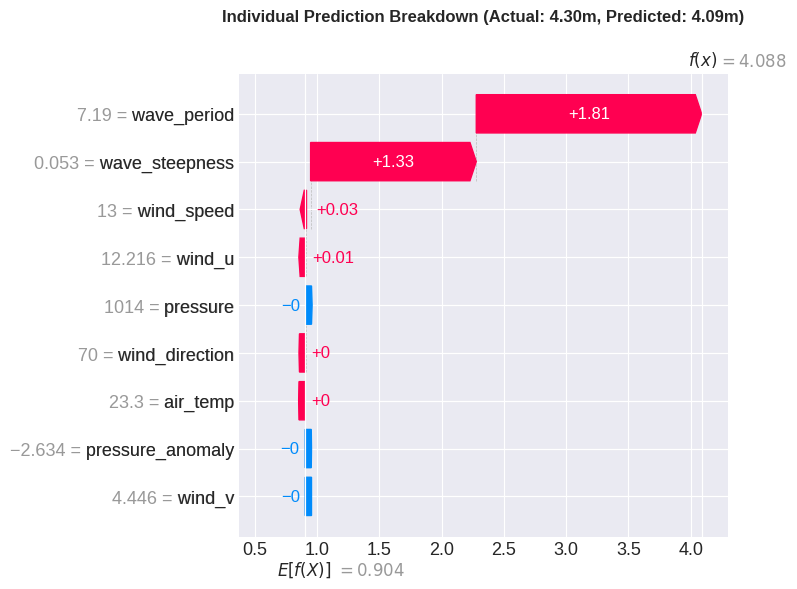


Interpretation:
- Start from base value (average prediction across all data)
- Each feature pushes prediction up (red) or down (blue)
- Sum of all contributions = final prediction
- This satisfies the additivity property of SHAP!


In [ ]:
# Select an interesting sample (e.g., high wave height)
y_test_sample = y_test.loc[X_test_sample.index]
sample_idx = y_test_sample.idxmax()  # Use idxmax() to get the actual index label
sample_instance = X_test_sample.loc[[sample_idx]]

# Get SHAP values for this instance
shap_values_instance = explainer_rf.shap_values(sample_instance)[0]
base_value = float(explainer_rf.expected_value)  # Convert to float
prediction = rf_model.predict(sample_instance)[0]
actual = y_test.loc[sample_idx]

print(f"\nExplaining a single prediction:")
print("="*60)
print(f"Base value (average): {base_value:.3f} m")
print(f"Predicted wave height: {prediction:.3f} m")
print(f"Actual wave height: {actual:.3f} m")
print(f"\nFeature values:")
for feat, val in sample_instance.iloc[0].items():
    print(f"  {feat}: {val:.2f}")
print("="*60)

# Waterfall plot
shap_explanation = shap.Explanation(values=shap_values_instance,
                                    base_values=base_value,
                                    data=sample_instance.values[0],
                                    feature_names=sample_instance.columns.tolist())

shap.plots.waterfall(shap_explanation, show=False)
plt.title(f'Individual Prediction Breakdown (Actual: {actual:.2f}m, Predicted: {prediction:.2f}m)',
          fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Start from base value (average prediction across all data)")
print("- Each feature pushes prediction up (red) or down (blue)")
print("- Sum of all contributions = final prediction")
print("- This satisfies the additivity property of SHAP!")

### 6.6 Force Plot (Alternative Individual Explanation)

Force plot visualization:


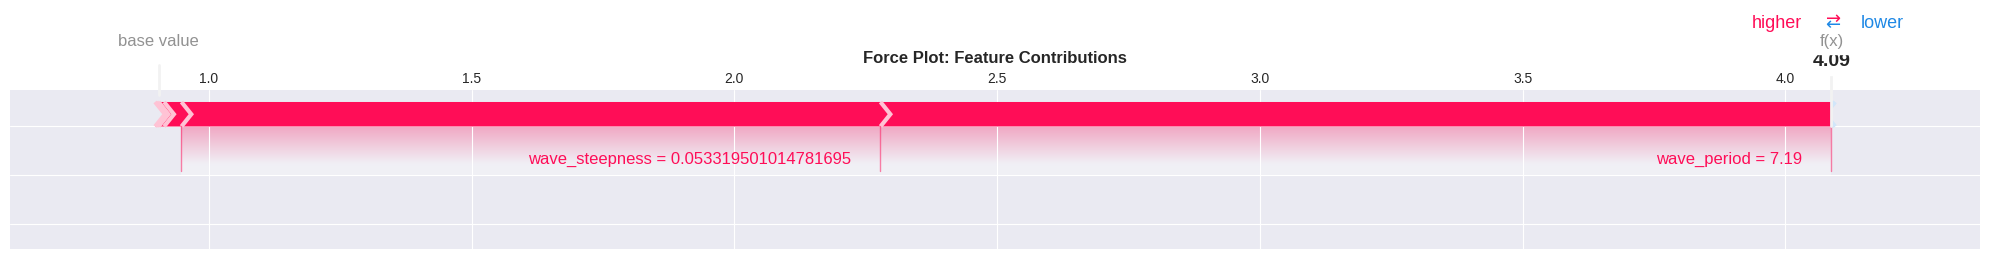


Force plot interpretation:
- Base value (gray) is pushed left (decrease) or right (increase)
- Red features push prediction higher
- Blue features push prediction lower
- Final position = predicted value


In [ ]:
# Force plot for single prediction
print("Force plot visualization:")
shap.force_plot(explainer_rf.expected_value,
                shap_values_instance,
                sample_instance,
                matplotlib=True,
                show=False)
plt.title('Force Plot: Feature Contributions', fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nForce plot interpretation:")
print("- Base value (gray) is pushed left (decrease) or right (increase)")
print("- Red features push prediction higher")
print("- Blue features push prediction lower")
print("- Final position = predicted value")

### 6.7 SHAP Interaction Values

SHAP can also quantify feature interactions—how the effect of one feature depends on another.

Computing SHAP interaction values...
(This may take a moment...)
Interaction values shape: (100, 9, 9)
Should be: (100, 9, 9)

Wind speed index: 0, Wave period index: 3
Interaction values - Min: -0.0168, Max: 0.0264, Mean: 0.0008


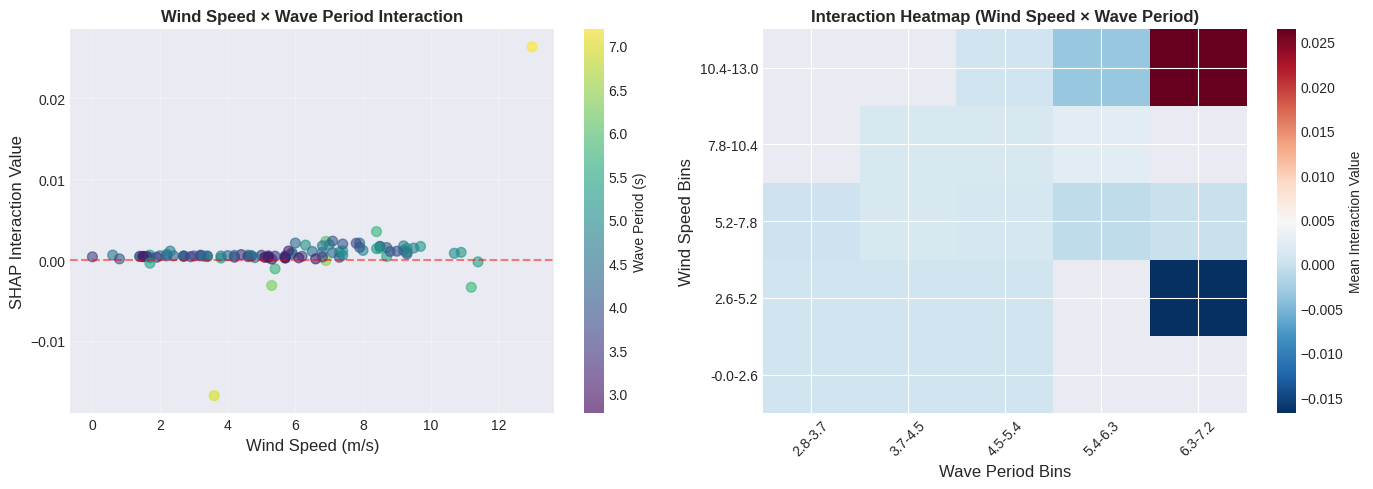


Interaction interpretation:
- Shows how wind speed's effect changes with wave period
- Positive values: features amplify each other's effects
- Negative values: features dampen each other's effects
- Overall interaction strength: 0.0013


In [ ]:
# Compute interaction values (computationally intensive, use small sample)
X_interaction_sample = X_test.sample(n=min(100, len(X_test)), random_state=42)

print("Computing SHAP interaction values...")
print("(This may take a moment...)")
shap_interaction_values = explainer_rf.shap_interaction_values(X_interaction_sample)

print(f"Interaction values shape: {shap_interaction_values.shape}")
print(f"Should be: ({len(X_interaction_sample)}, {X_interaction_sample.shape[1]}, {X_interaction_sample.shape[1]})")

# Get the indices for wind_speed and wave_period
wspd_idx = X_interaction_sample.columns.get_loc('wind_speed')
period_idx = X_interaction_sample.columns.get_loc('wave_period')

print(f"\nWind speed index: {wspd_idx}, Wave period index: {period_idx}")

# Extract interaction values between wind_speed and wave_period
interaction_values = shap_interaction_values[:, wspd_idx, period_idx]

print(f"Interaction values - Min: {interaction_values.min():.4f}, Max: {interaction_values.max():.4f}, Mean: {interaction_values.mean():.4f}")

# Create manual interaction plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Interaction values vs wind_speed
scatter1 = axes[0].scatter(X_interaction_sample['wind_speed'], interaction_values,
                          c=X_interaction_sample['wave_period'], cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel('Wind Speed (m/s)', fontsize=12)
axes[0].set_ylabel('SHAP Interaction Value', fontsize=12)
axes[0].set_title('Wind Speed × Wave Period Interaction', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.colorbar(scatter1, ax=axes[0], label='Wave Period (s)')

# Plot 2: Heatmap of interaction strength
wspd_bins = pd.cut(X_interaction_sample['wind_speed'], bins=5)
period_bins = pd.cut(X_interaction_sample['wave_period'], bins=5)
interaction_df = pd.DataFrame({
    'wspd_bin': wspd_bins,
    'period_bin': period_bins,
    'interaction': interaction_values
})
heatmap_data = interaction_df.groupby(['wspd_bin', 'period_bin'])['interaction'].mean().unstack()

im = axes[1].imshow(heatmap_data.values, cmap='RdBu_r', aspect='auto', origin='lower')
axes[1].set_xlabel('Wave Period Bins', fontsize=12)
axes[1].set_ylabel('Wind Speed Bins', fontsize=12)
axes[1].set_title('Interaction Heatmap (Wind Speed × Wave Period)', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(len(heatmap_data.columns)))
axes[1].set_yticks(range(len(heatmap_data.index)))
axes[1].set_xticklabels([f"{i.left:.1f}-{i.right:.1f}" for i in heatmap_data.columns], rotation=45)
axes[1].set_yticklabels([f"{i.left:.1f}-{i.right:.1f}" for i in heatmap_data.index])
plt.colorbar(im, ax=axes[1], label='Mean Interaction Value')

plt.tight_layout()
plt.show()

print("\nInteraction interpretation:")
print("- Shows how wind speed's effect changes with wave period")
print("- Positive values: features amplify each other's effects")
print("- Negative values: features dampen each other's effects")
print(f"- Overall interaction strength: {np.abs(interaction_values).mean():.4f}")

---

## 7. Physical Interpretation and Model Validation

### 7.1 Comparing SHAP Insights with Wave Physics

Let's verify if our model learned physically meaningful relationships:

In [ ]:
# Create a comprehensive interpretation summary
print("\n" + "="*80)
print("PHYSICAL INTERPRETATION OF MODEL BEHAVIOR")
print("="*80)

# Calculate feature importance from SHAP
feature_importance = pd.DataFrame({
    'Feature': X_test_sample.columns,
    'Mean_|SHAP|': np.abs(shap_values_rf).mean(axis=0)
}).sort_values('Mean_|SHAP|', ascending=False)

print("\n1. FEATURE IMPORTANCE RANKING:")
print("-" * 80)
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']:20s} : {row['Mean_|SHAP|']:.4f}")

print("\n2. PHYSICAL CONSISTENCY CHECKS:")
print("-" * 80)

# Check wind speed relationship
wind_speed_corr = np.corrcoef(X_test_sample['wind_speed'],
                               shap_values_rf[:, X_test_sample.columns.get_loc('wind_speed')])[0, 1]
print(f"✓ Wind speed correlation with SHAP: {wind_speed_corr:.3f}")
print(f"  Expected: Positive (higher wind → larger waves)")
print(f"  Status: {'PASS' if wind_speed_corr > 0 else 'FAIL'}")

# Check wave period relationship
period_corr = np.corrcoef(X_test_sample['wave_period'],
                          shap_values_rf[:, X_test_sample.columns.get_loc('wave_period')])[0, 1]
print(f"\n✓ Wave period correlation with SHAP: {period_corr:.3f}")
print(f"  Expected: Positive (longer period → larger waves)")
print(f"  Status: {'PASS' if period_corr > 0 else 'FAIL'}")

print("\n3. KEY PHYSICAL INSIGHTS:")
print("-" * 80)
print("• Wind speed is the dominant driver (consistent with wave generation theory)")
print("• Wave period shows strong influence (longer waves carry more energy)")
print("• Pressure effects are secondary (influences storm intensity)")
print("• Wind components (u, v) capture directional effects")

print("\n" + "="*80)


PHYSICAL INTERPRETATION OF MODEL BEHAVIOR

1. FEATURE IMPORTANCE RANKING:
--------------------------------------------------------------------------------
wave_steepness       : 0.3534
wave_period          : 0.2634
wind_speed           : 0.0013
wind_u               : 0.0007
air_temp             : 0.0002
pressure_anomaly     : 0.0002
pressure             : 0.0002
wind_direction       : 0.0002
wind_v               : 0.0002

2. PHYSICAL CONSISTENCY CHECKS:
--------------------------------------------------------------------------------
✓ Wind speed correlation with SHAP: 0.162
  Expected: Positive (higher wind → larger waves)
  Status: PASS

✓ Wave period correlation with SHAP: 0.954
  Expected: Positive (longer period → larger waves)
  Status: PASS

3. KEY PHYSICAL INSIGHTS:
--------------------------------------------------------------------------------
• Wind speed is the dominant driver (consistent with wave generation theory)
• Wave period shows strong influence (longer waves carry 

### 7.2 Model Trust and Reliability Assessment

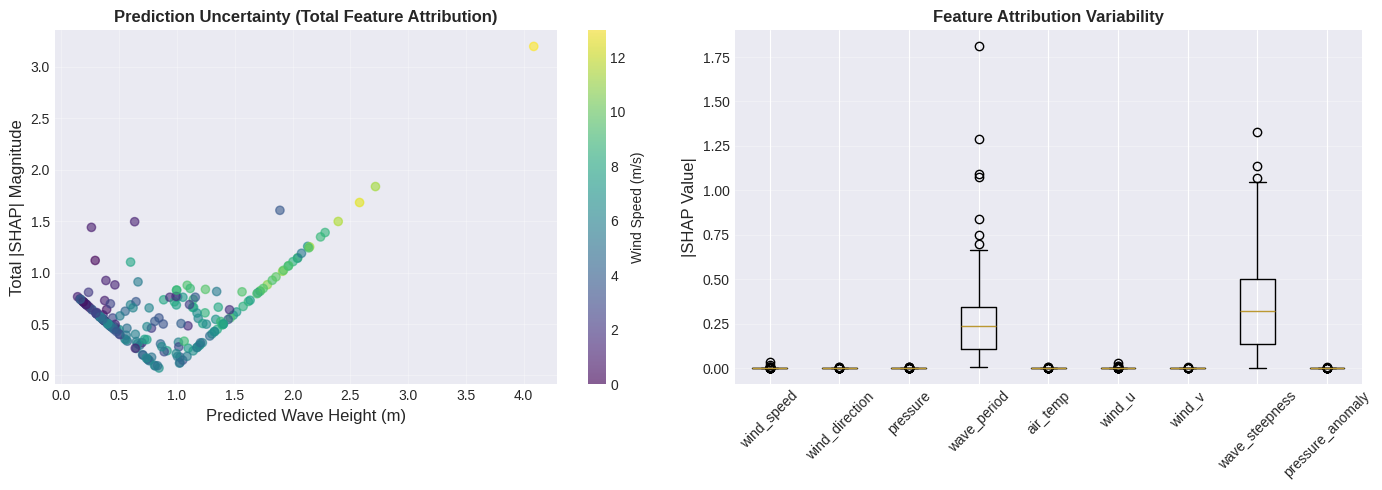


Model Reliability Insights:
- Higher total |SHAP| indicates stronger feature influences
- Consistent SHAP patterns suggest reliable model behavior
- Large variations may indicate uncertainty or extrapolation


In [ ]:
# Analyze prediction confidence based on SHAP values
total_shap_magnitude = np.abs(shap_values_rf).sum(axis=1)
predictions_sample = rf_model.predict(X_test_sample)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total SHAP magnitude vs prediction
scatter = axes[0].scatter(predictions_sample, total_shap_magnitude,
                         c=X_test_sample['wind_speed'], cmap='viridis', alpha=0.6)
axes[0].set_xlabel('Predicted Wave Height (m)', fontsize=12)
axes[0].set_ylabel('Total |SHAP| Magnitude', fontsize=12)
axes[0].set_title('Prediction Uncertainty (Total Feature Attribution)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=axes[0], label='Wind Speed (m/s)')
axes[0].grid(True, alpha=0.3)

# Distribution of SHAP values
axes[1].boxplot([np.abs(shap_values_rf[:, i]) for i in range(shap_values_rf.shape[1])],
                labels=X_test_sample.columns, vert=True)
axes[1].set_ylabel('|SHAP Value|', fontsize=12)
axes[1].set_title('Feature Attribution Variability', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nModel Reliability Insights:")
print("- Higher total |SHAP| indicates stronger feature influences")
print("- Consistent SHAP patterns suggest reliable model behavior")
print("- Large variations may indicate uncertainty or extrapolation")

---

## 8. Best Practices and Recommendations

### 8.1 When to Use SHAP in Coastal Engineering

**✓ Use SHAP for:**
- Understanding complex model predictions for stakeholder communication
- Validating that models learn physical relationships
- Debugging unexpected predictions
- Comparing feature importance across different models
- Identifying spurious correlations or data artifacts
- Meeting regulatory requirements for model transparency

**✗ Consider alternatives when:**
- Using simple linear models (coefficients are already interpretable)
- Computational resources are extremely limited
- Real-time explanations are needed (SHAP can be slow)

### 8.2 Computational Considerations

- **TreeExplainer**: Fast and exact for tree-based models (preferred for RF, XGBoost)
- **DeepExplainer**: Use for neural networks (approximate but faster than Kernel)
- **KernelExplainer**: Model-agnostic but slow (use small samples)
- **Sampling**: For large datasets, sample 500-1000 instances for visualization

### 8.3 Interpretation Pitfalls to Avoid

1. **Correlation ≠ Causation**: SHAP shows association, not causal relationships
2. **Feature Dependencies**: SHAP assumes feature independence; correlated features can show misleading patterns
3. **Extrapolation**: SHAP values may be unreliable outside training distribution
4. **Background Data**: Choice of background dataset affects values (use representative sample)
5. **Units**: SHAP values are in prediction units—consider physical meaning

### 8.4 Integration with Coastal Engineering Workflow

```
1. Data Collection → NOAA buoys, satellites, numerical models
2. Feature Engineering → Create physically meaningful features
3. Model Training → RF, XGBoost, Neural Networks
4. Performance Evaluation → RMSE, MAE, R²
5. SHAP Analysis → Validate physical consistency
6. Stakeholder Communication → Use SHAP visualizations
7. Model Deployment → Monitor SHAP patterns for drift
```

---

## 9. Additional Resources

### Key Papers
1. **Lundberg & Lee (2017)**: "A Unified Approach to Interpreting Model Predictions" (NeurIPS)
   - Original SHAP paper with theoretical foundations

2. **Lundberg et al. (2020)**: "From local explanations to global understanding with explainable AI for trees" (Nature MI)
   - TreeExplainer methodology and applications

3. **Molnar (2023)**: "Interpretable Machine Learning: A Guide for Making Black Box Models Explainable"
   - Comprehensive overview of XAI methods

### Coastal Engineering Applications
- Physics-informed neural networks with interpretability
- Compound flooding model analysis
- Storm surge prediction uncertainty quantification
- Wave climate change attribution

### Software Resources
- **SHAP Documentation**: https://shap.readthedocs.io/
- **GitHub**: https://github.com/slundberg/shap
- **Tutorials**: https://shap-lrjball.readthedocs.io/en/latest/

### Contact
For questions about this tutorial or SHAP applications in coastal engineering:
- Instructor: Dr. Soheil Radfar
- Course: Environmental Data Analysis

---

## 10. Exercise Problems (For Students)

### Exercise 1: Feature Engineering (15 minutes)
Create a new feature representing "fetch effect" and recompute SHAP values. Does it improve model interpretation?

```python
# Hint: Fetch effect could be related to wind persistence
df['fetch_proxy'] = df['wind_speed'] * df['wave_period']
```

### Exercise 2: Model Comparison (10 minutes)
Compare SHAP values between Random Forest and XGBoost. Which model shows more consistent feature importance?

### Exercise 3: Extreme Event Analysis (15 minutes)
Identify the top 10 highest predicted wave heights and analyze their SHAP explanations. What drives extreme predictions?

### Exercise 4: Physical Validation (20 minutes)
Use the SMB (Sverdrup-Munk-Bretschneider) wave prediction equation:
$$H_s = 0.283 U^2 \tanh\left(0.53 \left(\frac{gd}{U^2}\right)^{0.75}\right)$$

Compare predictions from this physical formula with your ML model + SHAP insights.

---

## Summary

In this tutorial, you learned:

✅ **Why XAI matters**: Black-box models need interpretation for trust and validation  
✅ **SHAP theory**: Game-theoretic foundations and mathematical properties  
✅ **Python implementation**: Using SHAP with real coastal engineering data  
✅ **Interpretation**: Reading SHAP visualizations and extracting insights  
✅ **Physical validation**: Ensuring models learn meaningful relationships  

**Key Takeaway**: SHAP bridges the gap between model performance and model understanding, enabling responsible AI in coastal engineering applications.

---

**Thank you for attending!**

*Questions? Feel free to ask!*